In [0]:
#importing the libraries:
import numpy as np
import cv2
import random as rd
import math
import os
import matplotlib.pyplot as plt
import scipy.signal

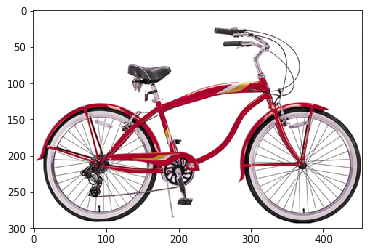

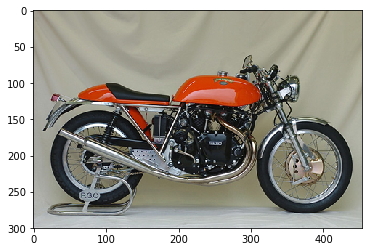

In [0]:
image1=cv2.imread("bicycle.bmp")
plt.imshow(image1[:,:,[2,1,0]])
plt.show()
image2=cv2.imread("motorcycle.bmp")
plt.imshow(image2[:,:,[2,1,0]])

In [0]:

def padding(Input,kernel):
  pad=np.zeros((Input.shape[0]+kernel.shape[0]-1,Input.shape[1]+kernel.shape[1]-1))
 
  for i in range(kernel.shape[0],Input.shape[0]+kernel.shape[0]-1):
    for j in range(kernel.shape[1],Input.shape[1]+kernel.shape[1]-1):
      pad[i][j]=Input[i-kernel.shape[0]][j-kernel.shape[1]]
  
  ans=pad
  return ans


In [0]:
#function for 2d convolution:
def my_conv2(Input,kernel):
  Conv=list()
  kernel=np.rot90(kernel,2)
  Input=padding(Input,kernel)
  for i in range(0,Input.shape[0]-kernel.shape[0]+1):
    r=list()
    S=0
    for j in range(0,Input.shape[1]-kernel.shape[1]+1): 
      S=np.sum(np.multiply(Input[i:i+kernel.shape[0],j:j+kernel.shape[1]],kernel))
      r.append(S)
    Conv.append(r)
  return Conv

In [0]:
#function for 3d convolution(convolution of rgb images:
def conv_3d(Image,kernel):
  Image0=my_conv2(Image[:,:,0],kernel)
  Image1=my_conv2(Image[:,:,1],kernel)
  Image2=my_conv2(Image[:,:,2],kernel)
  Image=np.dstack((Image0,Image1,Image2))
  
  return Image

In [0]:
#function for normalizing image data:
def normalize(Input):
  min1=np.min(Input)
  max1=np.max(Input)
  Input=((Input-min1)/(max1-min1))*255
  return Input

In [0]:
def normalize1(Input):
  min1=np.min(Input)
  max1=np.max(Input)
  Input=((Input-min1)/(max1-min1))
  return Input

In [0]:
#function for generating guassian low pass filter:
def gFilter(size,sigma):
  d = np.zeros((size,size))
  for i in range(size):
    for j in range(size):
      x = abs(i - size//2)
      y = abs(j - size//2)
      d[i][j] = np.sqrt(x**2+y**2)
  return np.exp(-(d**2/(2*sigma**2)))

In [0]:
def convert_grayscale(image):
  image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image=np.dstack((image,image,image))
  return image

In [0]:
#function for generating color hybrid images: 
def color_hybrid(image1,image2,size1,sigma1,size2,sigma2):
  low_filter1=gFilter(size1,sigma1)
  conv1_o=conv_3d(image1,low_filter1)
  
  low_filter2=gFilter(size2,sigma2)
  conv2_o=image2-conv_3d(image2,low_filter2)
  
  conv1_o=normalize1(conv1_o)
  conv2_o=normalize1(conv2_o)
  
  print("image1 after applying low pass filter:")
  plt.imshow(conv1_o[:,:,[2,1,0]])
  plt.show()
  print("image2 after applying high pass filter:")
  plt.imshow(conv2_o[:,:,[2,1,0]])
  plt.show()
  conv_o=cv2.add(conv1_o,conv2_o)
  conv_o=normalize1(conv_o)
  
  return conv_o

In [0]:
def grayscalehybrid_image(image1,image2,size1,sigma1,size2,sigma2):
  low_filter=gFilter(size1,sigma1)
  image1=my_conv2(image1,low_filter)
  image1=normalize(image1)
  
  low_filter1=gFilter(size2,sigma2)
  image2=image2-my_conv2(image2,low_filter1)
  image2=normalize(image2)
  
  conv_o=np.add(image1,image2)
  conv_o=normalize(conv_o)
  print('hybrid_image')
  plt.imshow(conv_o,cmap='gray')
  return 0


$$
\textbf{Generating hybrid images on rgb images }
$$

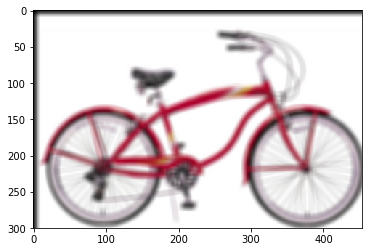

image2 after applying high pass filter:


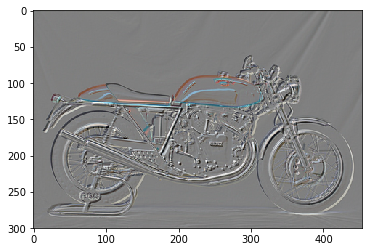

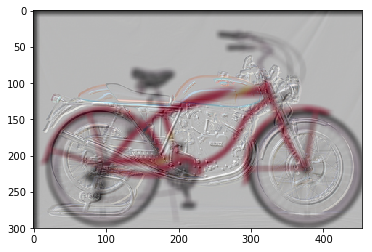

In [0]:
conv_o=color_hybrid(image1,image2,9,7,3,0.001)
plt.imshow(conv_o[:,:,[2,1,0]])



image1:


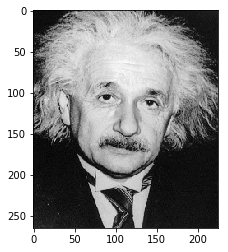

image2:


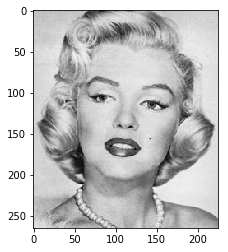

In [0]:
einstein_image=cv2.imread('einstein.bmp')
einstein_image = cv2.cvtColor(einstein_image, cv2.COLOR_BGR2GRAY)
print('image1:')
plt.imshow(einstein_image,cmap='gray')
plt.show()

marilyn_image=cv2.imread('marilyn.bmp')
marilyn_image = cv2.cvtColor(marilyn_image, cv2.COLOR_BGR2GRAY)
print('image2:')
plt.imshow(marilyn_image,cmap='gray')


# generating hybrid images on greyscale images

hybrid_image


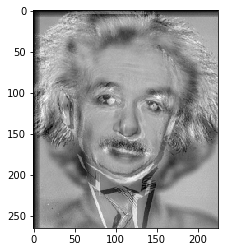

In [0]:
output1=grayscalehybrid_image(marilyn_image,einstein_image,9,7,9,0.00001)